In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
font = {'family' : 'Arial',
        'size': 12}

import networkx as nx

In [2]:
# Load data
filename = '../../results/pairwise_distance/within_strain_pairwise_distance_aa.csv'
within_strain_distance = pd.read_csv(filename, index_col = 0)
within_strain_distance['similar'] = within_strain_distance['distance']<=0.05 #95% similarly

# Make graph of nodes (all opa genes) and edges (similar opa genes) for all strains
nodes = np.unique(within_strain_distance[['id_A', 'id_B']].values.flatten())

nodes_with_attributes = []
for node in nodes:
    nodes_with_attributes.append((node, {'strain':node.split('_opa_')[0]}))
    
edges = list(within_strain_distance[within_strain_distance['similar']][['id_A', 'id_B']].itertuples(index=False, name=None))

G = nx.Graph()
G.add_nodes_from(nodes_with_attributes)
G.add_edges_from(edges)

# Get subgraphs for connected components of graph and record the number of similar opas in each group
strains = []
num_similar = []
ids = []
for connected_component in nx.connected_components(G):
    num_similar.append(len(connected_component))
    ids.append(list(connected_component))
    strains.append(list(connected_component)[0].split('_opa_')[0])
similar_opas = pd.DataFrame({'strain':strains, 'num_similar':num_similar, 'ids':ids})

In [3]:
strains = []
shannon_diversity = []
num_types = []
for strain, df in similar_opas.groupby('strain'):
    frac = (df['num_similar']/df['num_similar'].sum()).values
    strains.append(strain)
    shannon_diversity.append(-1*np.sum(frac*np.log(frac)))
    num_types.append(len(df))

shannon_diversity_df = pd.DataFrame({'strain':strains, 'shannon_diversity':shannon_diversity, 'num_types':num_types})

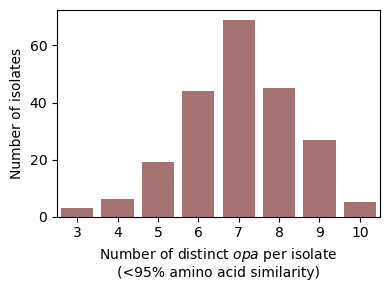

In [5]:
plt.figure(figsize = (4,3))
sns.countplot(shannon_diversity_df, x = 'num_types', color = '#ad6a6c')
plt.xlabel('Number of distinct $opa$ per isolate\n(<95% amino acid similarity)')
plt.ylabel('Number of isolates')
plt.tight_layout()
plt.savefig('../../figures/diversity/num_opa_types_per_isolate.png', dpi = 300)
plt.savefig('../../figures/diversity/num_opa_types_per_isolate.pdf')
plt.show()

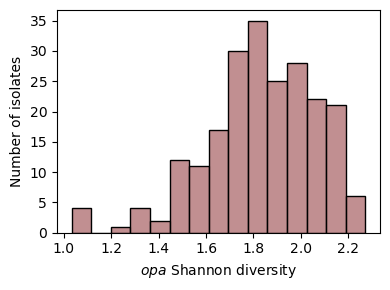

In [12]:
plt.figure(figsize = (4,3))
sns.histplot(shannon_diversity_df, bins = 15, x = 'shannon_diversity', color = '#ad6a6c')
plt.xlabel('$opa$ Shannon diversity')
plt.ylabel('Number of isolates')
plt.tight_layout()
plt.savefig('../../figures/diversity/shannon_diversity_per_isolate.png', dpi = 300)
plt.savefig('../../figures/diversity/shannon_diversity_per_isolate.pdf')
plt.show()

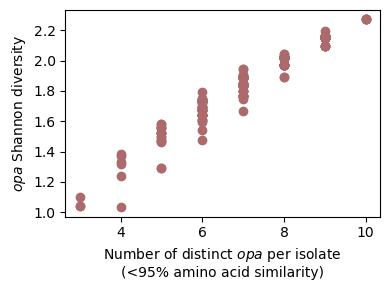

In [13]:
plt.figure(figsize = (4,3))
plt.scatter(shannon_diversity_df['num_types'], shannon_diversity_df['shannon_diversity'], color = '#ad6a6c')
plt.xlabel('Number of distinct $opa$ per isolate\n(<95% amino acid similarity)')
plt.ylabel('$opa$ Shannon diversity')
plt.tight_layout()
plt.savefig('../../figures/diversity/num_opa_types_shannon_diversity_per_isolate.png', dpi = 300)
plt.savefig('../../figures/diversity/num_opa_types_shannon_diversity_per_isolate.pdf')
plt.show()

In [14]:
print('Num types summary statistics')
print('min: ', np.min(shannon_diversity_df['num_types'].values))
print('max: ', np.max(shannon_diversity_df['num_types'].values))
print('mean: ', np.mean(shannon_diversity_df['num_types'].values))

Num types summary statistics
min:  3
max:  10
mean:  7.009174311926605


In [15]:
print('Shannon diversity summary statistics')
print('min: ', np.min(shannon_diversity_df['shannon_diversity'].values))
print('max: ', np.max(shannon_diversity_df['shannon_diversity'].values))
print('mean: ', np.mean(shannon_diversity_df['shannon_diversity'].values))

Shannon diversity summary statistics
min:  1.0335620542068176
max:  2.2718685126965625
mean:  1.8351670983542492


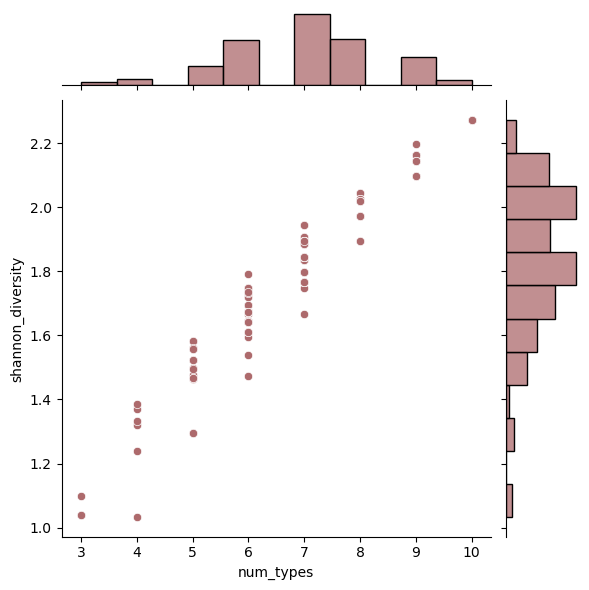

In [18]:
# plt.figure(figsize = (1,1))
sns.jointplot(data=shannon_diversity_df, x="num_types", y="shannon_diversity", color = '#ad6a6c')
plt.show()